In [ ]:
print("hello world!")

hello world!


Theory

1. What is a Support Vector Machine (SVM).

ans. A **Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm used for **classification, regression, and outlier detection**. It is especially effective for **binary classification tasks** and works well with both linear and non-linear data.

### **How SVM Works**
1. **Finding the Best Decision Boundary**  
   - SVM aims to find a **hyperplane** that best separates data points of different classes.
   - The best hyperplane is the one that maximizes the **margin** (distance) between the nearest data points (called **support vectors**) of different classes.

2. **Linear vs. Non-Linear SVM**
   - If data is **linearly separable**, SVM finds a straight-line (or flat hyperplane in higher dimensions) boundary.
   - If data is **not linearly separable**, SVM uses a **kernel trick** to transform data into a higher dimension where it becomes linearly separable.

3. **Kernel Trick**
   - SVM can map non-linearly separable data into a higher-dimensional space using kernel functions such as:
     - **Linear Kernel** (for linearly separable data)
     - **Polynomial Kernel** (for complex boundaries)
     - **Radial Basis Function (RBF) Kernel** (for highly non-linear data)
     - **Sigmoid Kernel** (used in neural networks)

4. **Soft Margin vs. Hard Margin**
   - **Hard Margin**: No misclassification allowed (only works for perfectly separable data).
   - **Soft Margin**: Allows some misclassification to handle noisy data (controlled by a parameter **C**).

### **Advantages of SVM**
- Works well with **small datasets**.
- Effective in **high-dimensional spaces**.
- Robust to **overfitting**, especially with the right **kernel and regularization**.

### **Disadvantages of SVM**
- Computationally expensive for **large datasets**.
- Choosing the right **kernel function** and **hyperparameters** requires experimentation.

### **Applications of SVM**
- **Text classification** (spam detection, sentiment analysis)
- **Image recognition** (face detection)
- **Bioinformatics** (cancer detection)
- **Stock market predictions**
- **Anomaly detection**

2. What is the difference between Hard Margin and Soft Margin SVM.

ans. The difference between **Hard Margin SVM** and **Soft Margin SVM** lies in how strictly they enforce class separation.

### **1. Hard Margin SVM** (Strict Separation)
- Assumes that the data is **perfectly linearly separable** (i.e., no overlapping classes).
- Finds a hyperplane that **completely separates** the classes **without allowing any misclassification**.
- **No flexibility** for noisy or overlapping data.
- Works well **only if** the data is **clean and perfectly separable**.
- **Limitation:** Sensitive to outliers, as a single misclassified point can drastically change the hyperplane.

✅ **Best for**: Perfectly separable, clean datasets.  
❌ **Not suitable for**: Noisy or overlapping data.

---

### **2. Soft Margin SVM** (Allows Some Misclassification)
- Introduces a **tolerance for misclassification** using a **slack variable (ξ)**.
- The **C parameter** controls the trade-off between **maximizing the margin** and **minimizing classification errors**:
  - **High C** → Less tolerance for misclassification (more like Hard Margin).
  - **Low C** → More tolerance for misclassification (better for noisy data).
- Allows some points to be inside the margin or even misclassified if it improves generalization.

✅ **Best for**: Noisy, overlapping, or non-linearly separable data.  
❌ **Downside**: Requires tuning the **C** parameter to balance performance.

---

### **Key Differences:**
| Feature | Hard Margin SVM | Soft Margin SVM |
|---------|---------------|----------------|
| **Misclassification Allowed?** | ❌ No | ✅ Yes |
| **Works with Noisy Data?** | ❌ No | ✅ Yes |
| **Outlier Sensitivity** | ❗ Very high | ⚖️ Moderate |
| **Regularization Parameter (C)?** | ❌ No C parameter | ✅ C controls margin flexibility |
| **Use Case** | Clean, perfectly separable data | Real-world, noisy data |

### **Which One Should You Use?**
- If your data is **perfectly separable**, **Hard Margin** might work well.
- If your data is **noisy or overlapping**, use **Soft Margin** with proper tuning of **C**.

3.  What is the mathematical intuition behind SVM.

ans. The mathematical intuition behind **Support Vector Machine (SVM)** revolves around **maximizing the margin** between two classes in a high-dimensional space. Let's break it down step by step.

---

## **1. Goal of SVM**
Given a dataset \(\{(x_i, y_i)\}\), where:
- \(x_i \in \mathbb{R}^n\) are feature vectors
- \(y_i \in \{-1, +1\}\) are class labels

SVM aims to find the **optimal hyperplane** that separates the two classes **while maximizing the margin**.

### **Equation of a Hyperplane**
A hyperplane in an \(n\)-dimensional space is defined as:
\[
w^T x + b = 0
\]
where:
- \(w\) is the weight vector (normal to the hyperplane),
- \(b\) is the bias (offset from the origin),
- \(x\) is the input feature vector.

For a given point \(x_i\), the classification rule is:
\[
\hat{y}_i = \text{sign}(w^T x_i + b)
\]

---

## **2. Finding the Optimal Hyperplane**
### **Defining the Margin**
The margin is the distance between the **closest data points (support vectors)** and the hyperplane. The goal is to **maximize this margin**.

The margin is given by:
\[
\text{Margin} = \frac{2}{\|w\|}
\]

**Constraints:**
For correctly classified points:
\[
y_i (w^T x_i + b) \geq 1, \quad \forall i
\]

Thus, maximizing the margin is equivalent to minimizing \(\frac{1}{2} \|w\|^2\), leading to the following optimization problem:

\[
\min_{w, b} \frac{1}{2} \|w\|^2
\]
subject to:
\[
y_i (w^T x_i + b) \geq 1, \quad \forall i
\]

This is a **convex optimization problem** that can be solved using **Lagrange multipliers**.

---

## **3. Soft Margin SVM (Handling Misclassification)**
In real-world data, **perfect separation is often impossible**. To handle this, we introduce **slack variables** \(\xi_i\) to allow some misclassification:

\[
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]

The objective function now becomes:
\[
\min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
\]
where \(C\) is a **regularization parameter** that controls the trade-off between **margin size** and **misclassification**.

- **Large \(C\)** → Penalizes misclassification more, leading to a stricter margin.
- **Small \(C\)** → Allows more misclassification, resulting in a more flexible margin.

---

## **4. Kernel Trick (For Non-Linearly Separable Data)**
If data is **not linearly separable**, we map it into a **higher-dimensional space** using a function \(\phi(x)\), such that:

\[
\Phi: x \rightarrow \phi(x)
\]

Instead of computing \(\phi(x)\) explicitly, we use a **kernel function** \(K(x_i, x_j)\), which computes the dot product in the transformed space:

\[
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
\]

Common **Kernel Functions**:
- **Linear Kernel**: \(K(x_i, x_j) = x_i^T x_j\)
- **Polynomial Kernel**: \(K(x_i, x_j) = (x_i^T x_j + c)^d\)
- **RBF (Gaussian) Kernel**: \(K(x_i, x_j) = e^{-\gamma \|x_i - x_j\|^2}\)

This allows SVM to **classify non-linearly separable data efficiently**.

---

## **5. Dual Formulation & Lagrange Multipliers**
SVM is typically solved using **Lagrange multipliers** \(\alpha_i\), leading to the **dual problem**:

\[
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
\]

subject to:

\[
0 \leq \alpha_i \leq C, \quad \sum_{i=1}^{n} \alpha_i y_i = 0
\]

Here, **only support vectors have nonzero \(\alpha_i\)**, meaning SVM **ignores non-support vectors**, making it computationally efficient.

---

## **Summary of Key Concepts**
| Concept | Explanation |
|---------|-------------|
| **Hyperplane** | Decision boundary separating classes |
| **Margin** | Distance between support vectors and the hyperplane |
| **Hard Margin** | No misclassification, perfect separation |
| **Soft Margin** | Allows misclassification (uses slack variables \(\xi_i\)) |
| **Kernel Trick** | Maps data into higher dimensions for non-linear separation |
| **Dual Formulation** | Uses Lagrange multipliers \(\alpha_i\) to solve efficiently |

---

### 🚀 **Final Thoughts**
- **SVM works by maximizing the margin**, ensuring the best generalization.
- **Soft margin SVM** is used when data is noisy or overlapping.
- **Kernel trick** helps in handling **non-linearly separable data** efficiently.
- The **Lagrange dual problem** allows efficient computation by focusing only on **support vectors**.

4.  What is the role of Lagrange Multipliers in SVM.

ans. ### **Role of Lagrange Multipliers in SVM**  
Lagrange multipliers play a crucial role in **converting the constrained optimization problem of SVM into an easier dual formulation**, making it computationally efficient. Let’s break it down step by step.

---

## **1. SVM as a Constrained Optimization Problem**
The objective of SVM is to **find the hyperplane** \( w^T x + b = 0 \) that **maximizes the margin** while ensuring correct classification.

### **Primal Formulation of SVM**
For a dataset \( \{(x_i, y_i)\} \) where \( y_i \in \{-1, +1\} \), the optimization problem is:

\[
\min_{w, b} \frac{1}{2} \|w\|^2
\]

subject to:

\[
y_i (w^T x_i + b) \geq 1, \quad \forall i
\]

This is a **quadratic optimization problem with linear constraints**.

---

## **2. Using Lagrange Multipliers to Solve the Problem**
Since this is a **constrained optimization problem**, we use the **Lagrangian function** to convert it into an unconstrained problem.

We introduce **Lagrange multipliers** \( \alpha_i \geq 0 \) (one for each constraint) and define the **Lagrangian function**:

\[
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^{n} \alpha_i [y_i (w^T x_i + b) - 1]
\]

where:
- \( \alpha_i \) are the **Lagrange multipliers** (one per data point).
- \( \alpha_i \geq 0 \) ensures that constraints hold.

### **Karush-Kuhn-Tucker (KKT) Conditions**
To optimize \( L(w, b, \alpha) \), we take derivatives and set them to zero:

1. **Derivative w.r.t. \( w \)**:
   \[
   \frac{\partial L}{\partial w} = w - \sum_{i=1}^{n} \alpha_i y_i x_i = 0
   \]
   \[
   \Rightarrow w = \sum_{i=1}^{n} \alpha_i y_i x_i
   \]
   This means **\( w \) is a weighted sum of the training examples**.

2. **Derivative w.r.t. \( b \)**:
   \[
   \frac{\partial L}{\partial b} = \sum_{i=1}^{n} \alpha_i y_i = 0
   \]
   This ensures that the **weighted sum of class labels is zero**, maintaining class balance.

---

## **3. Dual Formulation of SVM**
Substituting \( w \) in the Lagrangian function, we obtain the **dual form**:

\[
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i^T x_j)
\]

subject to:

\[
\sum_{i=1}^{n} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
\]

where:
- The **dot product \( x_i^T x_j \)** allows easy computation.
- The **regularization parameter \( C \)** controls **soft margin SVM**.
- **Only support vectors** have **nonzero** \( \alpha_i \), making SVM computationally efficient.

---

## **4. Intuition Behind Lagrange Multipliers**
- **\( \alpha_i = 0 \) → Non-support vectors** (don’t influence the decision boundary).
- **\( \alpha_i > 0 \) → Support vectors** (they define the margin).
- **Only support vectors determine the final model**, making SVM **robust to outliers**.

---

## **5. Kernel Trick (Extending to Non-Linear Cases)**
Using **kernel functions** \( K(x_i, x_j) \), we replace \( x_i^T x_j \) with:

\[
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
\]

Thus, the **dual problem** becomes:

\[
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
\]

This allows SVM to **classify non-linearly separable data** efficiently.

---

## **6. Summary: Why Use Lagrange Multipliers?**
✅ Converts the constrained optimization problem into an easier **dual problem**.  
✅ Reduces computation by focusing only on **support vectors**.  
✅ Allows for the **Kernel Trick**, making SVM applicable to **non-linear classification**.  
✅ Ensures **max-margin classification**, improving generalization.

5. What are Support Vectors in SVM.

ans. ### **Support Vectors in SVM**  

#### **Definition**  
Support Vectors are the **data points closest to the decision boundary (hyperplane)** that directly influence its position and orientation. They define the **margin** of the classifier in **Support Vector Machines (SVM)**.

---

### **1. Role of Support Vectors**
- They **lie on the margin boundaries** or **within the margin (for soft-margin SVM).**
- They are the **most important data points** because the SVM decision boundary **depends only on them**.
- If support vectors are **removed or altered**, the decision boundary **changes**.

---

### **2. Support Vectors in Hard vs. Soft Margin SVM**
#### **Hard Margin SVM (Perfectly Separable Data)**
- Support Vectors **lie exactly on the margin** (distance = margin width).
- No data points are inside the margin or misclassified.
- **Constraint:** \( y_i (w^T x_i + b) = 1 \) for support vectors.

#### **Soft Margin SVM (Noisy or Overlapping Data)**
- Some support vectors may **fall inside the margin** (with slack variable \( \xi_i > 0 \)).
- Some may be **misclassified** if noise exists in the data.
- **Constraint:** \( y_i (w^T x_i + b) \geq 1 - \xi_i \), where \( \xi_i \) measures how much a point violates the margin.

---

### **3. Mathematical Importance of Support Vectors**
In the **dual form of SVM**, the weight vector \( w \) is expressed as:

\[
w = \sum_{i=1}^{n} \alpha_i y_i x_i
\]

where \( \alpha_i \) are the **Lagrange multipliers**.

- **If \( \alpha_i = 0 \)** → The point is **not a support vector**.
- **If \( \alpha_i > 0 \)** → The point is a **support vector**.
- **Only support vectors contribute to the decision boundary**, while **other points do not matter**.

The decision function is:

\[
f(x) = \sum_{i} \alpha_i y_i K(x_i, x) + b
\]

where **only support vectors** are used in the summation.

---

### **4. Why are Support Vectors Important?**
✅ **Define the margin** → The wider the margin, the better the generalization.  
✅ **Reduce computational complexity** → Only a few data points influence the classifier.  
✅ **Handle high-dimensional spaces efficiently** → Works well with fewer training examples.  
✅ **Enable kernel trick** → Support Vectors are used to compute the decision function in non-linear cases.

---

### **5. Example Visualization**
Imagine a **binary classification problem**:

- Most points are far from the decision boundary and **don’t impact** its position.
- A few critical points **close to the boundary** determine where the margin is.
- These **critical points are the support vectors**.

---

### **6. Summary**
| **Feature** | **Support Vectors** |
|------------|---------------------|
| **Definition** | Data points closest to the decision boundary |
| **Influence** | Directly determine the hyperplane and margin |
| **Mathematical Role** | Only points with \( \alpha_i > 0 \) affect the decision function |
| **Soft vs. Hard Margin** | Soft Margin allows some inside the margin or misclassified |
| **Computational Benefit** | Reduces problem complexity, making SVM efficient |

6. What is a Support Vector Classifier (SVC).

ans. ### **Support Vector Classifier (SVC) - Explained**  

#### **Definition:**  
A **Support Vector Classifier (SVC)** is a **soft-margin extension of Support Vector Machines (SVM)** that allows for **some misclassification** while still aiming to maximize the margin. It is used for **binary classification problems** where data may not be perfectly separable.

---

## **1. How SVC Works**
SVC finds the best **hyperplane** that separates two classes while **allowing some data points to be inside the margin or misclassified**.

### **Mathematical Formulation of SVC**
Given a dataset \( \{(x_i, y_i)\} \), where:
- \( x_i \) is the feature vector.
- \( y_i \in \{-1, +1\} \) is the class label.

SVC solves the following optimization problem:

\[
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
\]

subject to:

\[
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]

where:
- \( w \) is the weight vector.
- \( b \) is the bias term.
- \( \xi_i \) are **slack variables** that allow misclassification.
- \( C \) is the **regularization parameter**, controlling the trade-off between **margin size** and **misclassification penalty**.

---

## **2. Hard Margin SVM vs. Soft Margin SVC**
| Feature | **Hard Margin SVM** | **Soft Margin SVC** |
|---------|------------------|------------------|
| **Data Type** | Perfectly separable | May have overlapping classes |
| **Misclassification Allowed?** | ❌ No | ✅ Yes (controlled by \( C \)) |
| **Margin Type** | Maximum possible margin | Wider margin with some violations |
| **Slack Variables \( \xi_i \)** | Not used | Used to handle misclassification |
| **Regularization \( C \)** | Not needed | Balances margin and misclassification |

---

## **3. Role of Regularization Parameter \( C \)**
- **Large \( C \) → Less misclassification (tighter margin, risk of overfitting).**  
- **Small \( C \) → More misclassification allowed (wider margin, better generalization).**  

🔹 **High \( C \)** → Prioritizes **correct classification** over margin size.  
🔹 **Low \( C \)** → Prioritizes **wider margin** over strict classification.

---

## **4. SVC and the Kernel Trick**
When data is **not linearly separable**, we use **kernels** to transform it into a higher-dimensional space.

Common **Kernel Functions**:
- **Linear Kernel**: \( K(x_i, x_j) = x_i^T x_j \)  
- **Polynomial Kernel**: \( K(x_i, x_j) = (x_i^T x_j + c)^d \)  
- **Radial Basis Function (RBF) Kernel**: \( K(x_i, x_j) = e^{-\gamma \|x_i - x_j\|^2} \)  
- **Sigmoid Kernel**: \( K(x_i, x_j) = \tanh(\beta x_i^T x_j + c) \)  

The **kernel trick** allows SVC to classify **non-linearly separable data** efficiently.

---

## **5. Summary**
✅ **SVC is a soft-margin extension of SVM** that allows misclassification.  
✅ **Slack variables \( \xi_i \) help handle overlapping data.**  
✅ **Regularization parameter \( C \) controls the trade-off between margin size and misclassification.**  
✅ **The kernel trick enables non-linear classification.**

7. What is a Support Vector Regressor (SVR).

ans. ### **Support Vector Regressor (SVR) - Explained**  

#### **Definition:**  
A **Support Vector Regressor (SVR)** is an extension of **Support Vector Machines (SVM)** used for **regression tasks** instead of classification. Unlike standard regression methods that minimize the error directly, **SVR tries to fit a model within a certain margin (ε-tube) while minimizing complexity**.

---

## **1. How SVR Works**
SVR aims to find a function \( f(x) \) that predicts outputs \( y \) with a tolerance margin \( \epsilon \), meaning predictions **within \( \epsilon \)-distance from actual values are not penalized**.

### **Mathematical Formulation of SVR**
Given a dataset \( \{(x_i, y_i)\} \), SVR finds a function:

\[
f(x) = w^T x + b
\]

that minimizes:

\[
\frac{1}{2} \|w\|^2
\]

subject to the constraints:

\[
| y_i - (w^T x_i + b) | \leq \epsilon
\]

This means:
- **Predictions within \( \epsilon \)-tube are ignored (no penalty).**
- **Only points outside the margin contribute to the loss (Slack Variables \( \xi_i \)).**

To handle **violations** beyond \( \epsilon \), we introduce **slack variables \( \xi_i \)**:

\[
| y_i - (w^T x_i + b) | \leq \epsilon + \xi_i, \quad \xi_i \geq 0
\]

Thus, the objective function becomes:

\[
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
\]

where:
- \( C \) controls the trade-off between **model complexity** and **error tolerance**.
- \( \epsilon \) defines the **margin of tolerance** (higher \( \epsilon \) → less sensitive to small errors).

---

## **2. Key Hyperparameters in SVR**
| **Parameter** | **Role** |
|--------------|---------|
| \( C \) | Regularization parameter (higher \( C \) → lower bias, higher variance) |
| \( \epsilon \) | Defines the margin where errors are ignored (higher \( \epsilon \) → simpler model) |
| \( \gamma \) | Controls the influence of individual points in RBF/poly kernels |

---

## **3. Kernel Trick in SVR**
Like **SVC**, SVR can use **kernel functions** to model non-linear relationships:

- **Linear Kernel** → \( K(x_i, x_j) = x_i^T x_j \)  
- **Polynomial Kernel** → \( K(x_i, x_j) = (x_i^T x_j + c)^d \)  
- **Radial Basis Function (RBF) Kernel** → \( K(x_i, x_j) = e^{-\gamma \|x_i - x_j\|^2} \)  

This allows SVR to **handle complex, non-linear regression problems**.

---

## **4. Differences Between SVR and Other Regression Methods**
| Feature | **SVR** | **Linear Regression** | **Decision Tree Regression** |
|---------|--------|------------------|----------------------|
| **Error Handling** | Ignores errors within \( \epsilon \) | Minimizes squared error | Fits piecewise constant functions |
| **Regularization** | Yes (via \( C \) and \( \epsilon \)) | No regularization | Prone to overfitting |
| **Non-linearity** | Possible with kernels | Linear only | Can handle non-linearity |
| **Robustness to Outliers** | More robust (only support vectors matter) | Sensitive to outliers | Sensitive to overfitting |

---

## **5. Summary**
✅ **SVR is an extension of SVM for regression tasks.**  
✅ **Uses an \( \epsilon \)-tube to ignore small errors.**  
✅ **Optimizes both margin and model complexity.**  
✅ **Supports non-linearity via kernel functions.**  
✅ **Robust to outliers due to reliance on support vectors.**  

8.  What is the Kernel Trick in SVM.

ans. ### **Kernel Trick in SVM – Explained**  

#### **Definition:**  
The **Kernel Trick** is a mathematical technique in **Support Vector Machines (SVM)** that allows it to solve **non-linearly separable problems** by transforming the input features into a **higher-dimensional space** where the data becomes linearly separable. This is done **without explicitly computing the transformation**, making it computationally efficient.

---

## **1. Why Do We Need the Kernel Trick?**
In real-world datasets, classes are often **not linearly separable** in their original feature space. Instead of manually **adding more features** or using complex transformations, the **Kernel Trick** implicitly maps data to a higher-dimensional space where a **linear hyperplane** can separate the classes.

Example:
- In **2D**, some datasets cannot be separated with a straight line.
- In **3D** (higher dimension), a **hyperplane (e.g., a circle or paraboloid)** may be able to separate them.

🔹 **Key Idea:** Instead of transforming each data point manually, the **Kernel Trick computes the dot product in higher dimensions directly** using a kernel function.

---

## **2. How Does the Kernel Trick Work?**
Instead of explicitly mapping data from input space \( X \) to higher-dimensional space \( \phi(X) \), we compute the dot product:

\[
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
\]

where:
- \( \phi(x) \) is the feature transformation function (which is often unknown).
- \( K(x_i, x_j) \) is the **kernel function**, which directly computes the transformed dot product **without explicitly transforming \( x \)**.

---

## **3. Common Kernel Functions in SVM**
Different kernels are used to capture different data relationships:

### **1. Linear Kernel (For Linearly Separable Data)**
\[
K(x_i, x_j) = x_i^T x_j
\]
- Equivalent to **standard SVM** without a kernel.
- Used when data is **already linearly separable**.

---

### **2. Polynomial Kernel (For Feature Interactions)**
\[
K(x_i, x_j) = (x_i^T x_j + c)^d
\]
- \( c \) is a constant, \( d \) is the polynomial degree.
- Useful for **capturing interactions** between features.

✅ Example: If the dataset follows a **quadratic** or **cubic** pattern.

---

### **3. Radial Basis Function (RBF) Kernel (For Complex Boundaries)**
\[
K(x_i, x_j) = e^{-\gamma \|x_i - x_j\|^2}
\]
- \( \gamma \) controls how much influence a single training example has.
- Higher \( \gamma \) → **More flexible decision boundary (risk of overfitting)**.
- Lower \( \gamma \) → **Smoother decision boundary (risk of underfitting)**.

✅ Used when **data is highly non-linear**.

---

### **4. Sigmoid Kernel (Like Neural Networks)**
\[
K(x_i, x_j) = \tanh(\beta x_i^T x_j + c)
\]
- Similar to activation functions in **Neural Networks**.
- Less commonly used in SVM due to **scaling issues**.

---

## **4. Pros & Cons of the Kernel Trick**
| **Feature** | **Pros** | **Cons** |
|------------|---------|---------|
| **Computational Efficiency** | Avoids explicitly mapping to high dimensions | Still expensive for large datasets |
| **Flexibility** | Can model complex relationships | Choosing the right kernel is tricky |
| **Non-linearity** | Works well on non-linear data | Needs hyperparameter tuning |
| **Overfitting Risk** | RBF and high-degree polynomial kernels can overfit | Requires careful tuning of \( C \) and \( \gamma \) |

---

## **5. When to Use Which Kernel?**
| **Kernel** | **When to Use?** |
|-----------|----------------|
| **Linear Kernel** | Data is linearly separable (fastest) |
| **Polynomial Kernel** | Data has feature interactions (e.g., XOR patterns) |
| **RBF Kernel** | Data is complex and non-linear |
| **Sigmoid Kernel** | Similar to Neural Networks, but not common |

---

## **6. Summary**
✅ **The Kernel Trick transforms non-linear problems into a linearly separable space.**  
✅ **Kernel functions compute high-dimensional dot products efficiently.**  
✅ **RBF and Polynomial kernels help with non-linearly separable data.**  
✅ **Choosing the right kernel is crucial for model performance.**  

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

ans. ### **Comparison of Linear Kernel, Polynomial Kernel, and RBF Kernel in SVM**  

| Feature | **Linear Kernel** | **Polynomial Kernel** | **RBF Kernel** |
|---------|------------------|----------------------|---------------|
| **Formula** | \( K(x_i, x_j) = x_i^T x_j \) | \( K(x_i, x_j) = (x_i^T x_j + c)^d \) | \( K(x_i, x_j) = e^{-\gamma \|x_i - x_j\|^2} \) |
| **Complexity** | Low (Fastest) | Medium | High (Slowest) |
| **When to Use?** | When data is **linearly separable** | When **feature interactions** are important | When data is **highly non-linear** |
| **Parameters** | None | \( c \) (constant), \( d \) (degree) | \( \gamma \) (spread of similarity) |
| **Overfitting Risk** | Low | High if \( d \) is large | High if \( \gamma \) is too high |
| **Computational Cost** | Low | Medium to High | High |
| **Interpretability** | High (Simple Decision Boundary) | Medium | Low (Complex Boundaries) |
| **Decision Boundary** | Straight Line (Hyperplane) | Curved (Depends on \( d \)) | Highly Flexible |

---

## **Key Takeaways**
✅ **Use Linear Kernel** → When data is linearly separable and training is fast.  
✅ **Use Polynomial Kernel** → When interactions between features matter (e.g., XOR patterns).  
✅ **Use RBF Kernel** → When data has complex, non-linear patterns and needs flexible decision boundaries.  

10. What is the effect of the C parameter in SVM.

ans. ### **Effect of the \( C \) Parameter in SVM**  

#### **What is \( C \)?**  
The **\( C \) parameter** in **Support Vector Machines (SVM)** controls the **trade-off between maximizing the margin and minimizing classification errors**. It determines how much the model **penalizes misclassified points**.

---

## **1. How \( C \) Affects SVM**
- **Small \( C \) → Large Margin, More Tolerance for Errors**  
  - SVM prioritizes **a wider margin**, even if some points are misclassified.  
  - Leads to **better generalization** (less overfitting).  
  - More robust to noise.
  
- **Large \( C \) → Smaller Margin, Less Tolerance for Errors**  
  - SVM tries to **classify all training points correctly**.  
  - Decision boundary becomes **tighter around training data**.  
  - More prone to **overfitting** (poor generalization).  

---

## **2. Visualizing the Effect of \( C \)**
| **Value of \( C \)** | **Effect on Decision Boundary** | **Impact on Model** |
|----------------------|---------------------------------|----------------------|
| **Low \( C \)** (e.g., 0.1) | Wider margin, more misclassifications | Generalizes well, less overfitting |
| **Medium \( C \)** (e.g., 1) | Balanced margin and misclassification | Optimal trade-off |
| **High \( C \)** (e.g., 100) | Narrower margin, fewer misclassifications | May overfit to noise |

---

## **3. Practical Example of \( C \) in SVM**
- **Use a small \( C \) when:**  
  - You want a **simpler model with better generalization**.  
  - Data may have **some noise**.  

- **Use a large \( C \) when:**  
  - You want **strict classification** with fewer misclassifications.  
  - You have **clean, well-separated data**.  

---

## **4. Summary**
✅ **Low \( C \)** → Wider margin, more misclassification allowed, better generalization.  
✅ **High \( C \)** → Narrow margin, fewer misclassifications, risk of overfitting.  
✅ \( C \) should be **tuned** based on dataset characteristics to optimize performance.  

11. What is the role of the Gamma parameter in RBF Kernel SVM.

ans. ### **Role of the Gamma ( \( \gamma \) ) Parameter in RBF Kernel SVM**  

#### **What is \( \gamma \)?**  
The **Gamma (\( \gamma \)) parameter** in the **Radial Basis Function (RBF) kernel** of **Support Vector Machines (SVM)** controls how far the influence of a **single training example reaches**. It defines the **similarity measure** between data points.

---

## **1. How \( \gamma \) Affects the Decision Boundary**
- **Low \( \gamma \) (e.g., 0.01)** → Large influence radius  
  - Each training point influences a **large** region.  
  - **Smoother, more generalized** decision boundary.  
  - **Risk: Underfitting** (model may be too simple).  

- **High \( \gamma \) (e.g., 10)** → Small influence radius  
  - Each training point influences a **small** region.  
  - Model becomes **more flexible** and can capture intricate patterns.  
  - **Risk: Overfitting** (too sensitive to noise).  

---

## **2. Visualizing the Effect of \( \gamma \)**  
| **Value of \( \gamma \)** | **Effect on Decision Boundary** | **Impact on Model** |
|-----------------|--------------------------------|----------------------|
| **Low \( \gamma \)** (e.g., 0.01) | Broad, smooth decision boundary | May underfit |
| **Medium \( \gamma \)** (e.g., 1) | Balanced decision boundary | Optimal generalization |
| **High \( \gamma \)** (e.g., 10) | Very complex, tightly fit to data | May overfit |

---

## **3. Choosing the Right \( \gamma \)**
- **Use a low \( \gamma \) when:**  
  - You want a **simple, generalizable model**.  
  - The dataset has **clear class separation**.  

- **Use a high \( \gamma \) when:**  
  - Data has **complex, fine-grained patterns**.  
  - You want to capture **detailed decision boundaries**.  

**Best Practice:** Tune \( \gamma \) using **cross-validation** along with the \( C \) parameter for the best results.

---

## **4. Summary**
✅ **Low \( \gamma \)** → Simpler model, smooth boundaries, risk of **underfitting**.  
✅ **High \( \gamma \)** → Complex model, tight boundaries, risk of **overfitting**.  
✅ **Must be tuned** for optimal balance between **bias and variance**.  

12.  What is the Naïve Bayes classifier, and why is it called "Naïve".

ans. ### **Naïve Bayes Classifier – Explained**  

#### **What is Naïve Bayes?**  
The **Naïve Bayes classifier** is a **probabilistic machine learning model** based on **Bayes' Theorem**. It is used for **classification tasks** and assumes that features are **conditionally independent**, given the class label.  

#### **Why is it called "Naïve"?**  
It is called **"Naïve"** because it makes a **strong assumption** that **all features are independent** of each other, which is rarely true in real-world data. Despite this unrealistic assumption, Naïve Bayes often performs well in practice.

---

## **1. Bayes' Theorem – Foundation of Naïve Bayes**  
\[
P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}
\]
where:
- \( P(A | B) \) → **Posterior probability** (probability of class \( A \) given data \( B \))  
- \( P(B | A) \) → **Likelihood** (probability of data \( B \) given class \( A \))  
- \( P(A) \) → **Prior probability** (probability of class \( A \) before seeing data)  
- \( P(B) \) → **Evidence** (probability of data \( B \) across all classes)  

### **Naïve Bayes Formula (Assuming Independence)**
\[
P(C | X_1, X_2, ..., X_n) \propto P(C) \cdot P(X_1 | C) \cdot P(X_2 | C) \cdots P(X_n | C)
\]
where:
- \( C \) → Class label  
- \( X_1, X_2, ..., X_n \) → Feature values  

The **independence assumption** simplifies the computation significantly.

---

## **2. Types of Naïve Bayes Classifiers**
| **Type** | **Used When Features Are** | **Example Applications** |
|----------|------------------------|--------------------|
| **Gaussian Naïve Bayes** | Continuous & Normally distributed | Spam detection, medical diagnosis |
| **Multinomial Naïve Bayes** | Discrete counts (e.g., word frequencies) | Text classification (e.g., spam detection) |
| **Bernoulli Naïve Bayes** | Binary features (0 or 1) | Sentiment analysis, fraud detection |

---

## **3. Advantages & Disadvantages**
### ✅ **Advantages**
✔ **Fast and Efficient** – Works well with large datasets.  
✔ **Performs well with high-dimensional data** (e.g., text classification).  
✔ **Simple and Interpretable** – Easy to implement and understand.  
✔ **Works well even with limited training data.**  

### ❌ **Disadvantages**
✖ **Independence Assumption is unrealistic** – Features are often correlated in real-world data.  
✖ **Poor Performance with Complex Relationships** – If features interact, it struggles.  
✖ **Zero Probability Problem** – If a category is missing in training, probability becomes zero (solved with **Laplace Smoothing**).  

---

## **4. When to Use Naïve Bayes?**
🔹 **Text Classification (Spam Filtering, Sentiment Analysis, NLP)**  
🔹 **Medical Diagnosis (e.g., Disease Prediction based on symptoms)**  
🔹 **Fraud Detection**  
🔹 **Recommendation Systems**  

13. What is Bayes’ Theorem.

ans. ### **Bayes' Theorem – Explained**  

#### **What is Bayes' Theorem?**  
Bayes' Theorem is a **mathematical formula** used to calculate **conditional probability**—the probability of an event occurring **given that another event has already occurred**. It is widely used in **statistics, probability theory, and machine learning**, especially in **Naïve Bayes classifiers**.

---

## **1. Bayes' Theorem Formula**  
\[
P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}
\]
where:
- \( P(A | B) \) → **Posterior probability** (probability of event \( A \) given event \( B \))  
- \( P(B | A) \) → **Likelihood** (probability of event \( B \) given event \( A \))  
- \( P(A) \) → **Prior probability** (probability of event \( A \) before seeing evidence)  
- \( P(B) \) → **Evidence** (total probability of event \( B \) happening)  

---

## **2. Intuition Behind Bayes' Theorem**
Bayes' Theorem helps **update our beliefs** based on new evidence. It combines:
1. **Prior knowledge** (before observing data).  
2. **Likelihood of new evidence** given a particular hypothesis.  
3. **Recalculation of the probability** (Posterior) after incorporating the new evidence.  

🔹 **Example:**  
A patient takes a test for a rare disease.  
- Prior probability (\( P(Disease) \)) = 1%  
- Test accuracy (\( P(Positive | Disease) \)) = 95%  
- False positive rate (\( P(Positive | No Disease) \)) = 5%  

Bayes' Theorem helps determine the probability that the patient actually has the disease given a positive test result.

---

## **3. Application of Bayes' Theorem**
| **Application** | **How Bayes' Theorem is Used** |
|---------------|--------------------------------|
| **Medical Diagnosis** | Probabilistic disease prediction based on symptoms |
| **Spam Filtering** | Determining if an email is spam based on words used |
| **Machine Learning (Naïve Bayes)** | Classifying data by computing conditional probabilities |
| **Weather Prediction** | Updating forecasts as new data arrives |
| **Fraud Detection** | Identifying fraud by analyzing transaction patterns |

---

## **4. Summary**
✅ **Bayes' Theorem calculates conditional probabilities based on prior knowledge and new evidence.**  
✅ **It is widely used in machine learning, statistics, and real-world decision-making.**  
✅ **Helps update probabilities dynamically as new data is received.**  

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

ans. ### **Differences Between Gaussian, Multinomial, and Bernoulli Naïve Bayes**  

| **Type** | **Feature Type** | **Mathematical Assumption** | **Use Case** |
|----------|----------------|----------------------------|-------------|
| **Gaussian Naïve Bayes** | Continuous numerical data | Assumes data follows a **normal (Gaussian) distribution** | Used in **continuous data** (e.g., medical diagnosis, sensor data, finance) |
| **Multinomial Naïve Bayes** | Discrete count-based data | Assumes data follows a **multinomial distribution** (frequency counts of words/tokens) | Used in **text classification (e.g., spam filtering, NLP, document categorization)** |
| **Bernoulli Naïve Bayes** | Binary (0/1) data | Assumes data follows a **Bernoulli distribution** (presence/absence of features) | Used in **binary text features (e.g., sentiment analysis, fraud detection, topic modeling)** |

---

## **1. Gaussian Naïve Bayes (GNB)**
📌 **Used for continuous numerical features** that follow a **normal distribution**.  
📌 Computes probabilities using the **Gaussian (Normal) Distribution formula**:  
\[
P(X | C) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(X - \mu)^2}{2\sigma^2}}
\]
where \( \mu \) is the mean and \( \sigma^2 \) is the variance.

### **Example Use Case:**
✅ **Medical Diagnosis:** Predicting disease based on age, blood pressure, etc.  
✅ **Finance:** Stock market trend analysis.  

---

## **2. Multinomial Naïve Bayes (MNB)**
📌 **Used for categorical, count-based data**, where features represent **word frequencies** in text documents.  
📌 Works best with **bag-of-words (BoW)** or **TF-IDF** representations.  
📌 Computes probability using a **Multinomial Distribution**:  
\[
P(X | C) = \frac{(N!) \prod P_i^{X_i}}{\prod X_i!}
\]
where \( N \) is the total count of words, and \( X_i \) is the count of word \( i \) in the document.

### **Example Use Case:**
✅ **Spam Filtering:** Counting occurrences of words in emails.  
✅ **Text Classification:** Categorizing news articles (e.g., sports, politics, tech).  

---

## **3. Bernoulli Naïve Bayes (BNB)**
📌 **Used for binary (0/1) features**, where features indicate **presence (1) or absence (0)** of certain words.  
📌 Works best when using **Boolean (binary) feature representation** of text.  
📌 Computes probability using **Bernoulli Distribution**:  
\[
P(X | C) = P_i^{X_i} (1 - P_i)^{(1 - X_i)}
\]
where \( P_i \) is the probability of a feature occurring.

### **Example Use Case:**
✅ **Sentiment Analysis:** Checking whether words like "good" or "bad" appear in a review.  
✅ **Fraud Detection:** Identifying suspicious transactions based on specific indicators.  

---

## **4. Summary**
✅ **Gaussian Naïve Bayes** → **Continuous data** (assumes normal distribution).  
✅ **Multinomial Naïve Bayes** → **Count-based text data** (word frequencies, NLP).  
✅ **Bernoulli Naïve Bayes** → **Binary (0/1) data** (presence/absence of features).  

15.  When should you use Gaussian Naïve Bayes over other variants.

ans. ### **When to Use Gaussian Naïve Bayes Over Other Variants**  

📌 **Use Gaussian Naïve Bayes (GNB) when your dataset has continuous numerical features** that approximately follow a **normal (Gaussian) distribution**.  

---

## **1. When is GNB the Best Choice?**  
✅ **Features are Continuous (Real-Valued Data)**  
   - If your dataset consists of **continuous variables** like height, weight, temperature, or blood pressure, GNB is a natural fit.  
   - Example: **Medical diagnosis** (predicting diseases based on blood pressure, cholesterol, etc.).  

✅ **Data Follows a Normal (Gaussian) Distribution**  
   - GNB works best when feature distributions are approximately **bell-shaped**.  
   - Example: **Stock price prediction** (daily returns often resemble a normal distribution).  

✅ **Fast Training and Low Memory Usage**  
   - Unlike complex models, GNB is **fast and efficient**, making it suitable for **large datasets** with many numerical features.  
   - Example: **Real-time fraud detection** (fast probability calculations on transaction data).  

✅ **Small or Noisy Datasets**  
   - If data is limited, GNB still works well because it **doesn’t require large amounts of training data** to perform well.  
   - Example: **Email classification** based on simple numerical attributes (word sentiment scores).  

---

## **2. When Not to Use GNB?**  
🚫 **If Features are Discrete or Categorical**  
   - If your features are **word counts (text data)**, **Multinomial Naïve Bayes** is a better choice.  
   - Example: Spam filtering (**word frequency-based** classification).  

🚫 **If Features are Binary (0/1) Indicators**  
   - If your dataset consists of **binary features** (e.g., whether a word is present or not), **Bernoulli Naïve Bayes** is preferred.  
   - Example: Sentiment analysis (**presence/absence of words like “great” or “bad”**).  

🚫 **If Features are Highly Correlated**  
   - Since GNB assumes **feature independence**, it performs poorly when features are **strongly correlated**.  
   - Example: If height and weight are both used to predict body mass index (BMI), GNB may not work well.  

---

## **3. Example Use Cases for Gaussian Naïve Bayes**
| **Use Case** | **Why GNB?** |
|-------------|-------------|
| **Medical Diagnosis** | Predicting diseases based on patient data (blood pressure, sugar levels, etc.) |
| **Stock Market Analysis** | Analyzing continuous variables like price trends, volatility, or returns |
| **Weather Prediction** | Predicting temperatures or atmospheric pressure |
| **Fraud Detection** | Detecting fraudulent transactions based on numerical indicators |

---

## **4. Summary**
✅ **Use Gaussian Naïve Bayes when you have continuous, normally distributed data.**  
✅ **Avoid it for text data, categorical data, or correlated features.**  
✅ **Fast and efficient for real-time classification tasks.**  

16. What are the key assumptions made by Naïve Bayes.

ans. ### **Key Assumptions of Naïve Bayes**  

Naïve Bayes makes **two major assumptions** that simplify probability calculations:  

---

## **1. Conditional Independence Assumption**  
📌 **Naïve Bayes assumes that all features are independent, given the class label.**  

Mathematically, if we want to classify an instance with features \(X_1, X_2, ..., X_n\) into class \(C\), we calculate:  

\[
P(C | X_1, X_2, ..., X_n) \propto P(C) \cdot P(X_1 | C) \cdot P(X_2 | C) \cdots P(X_n | C)
\]

🔹 **Example:**  
If we classify emails as spam or not spam based on words like "free," "offer," and "money," Naïve Bayes assumes that:  

\[
P("free", "offer", "money" | spam) = P("free" | spam) \cdot P("offer" | spam) \cdot P("money" | spam)
\]

❌ **Why is this assumption unrealistic?**  
- In real-world data, features are often correlated.  
- Example: In **text classification**, words like "discount" and "offer" tend to appear together, but Naïve Bayes treats them as independent.  

✅ **Why does it still work well?**  
- Even if the independence assumption is not fully true, Naïve Bayes often performs surprisingly well in practice, especially for **text classification** and **spam detection**.  

---

## **2. Feature Distribution Assumption**  
Naïve Bayes assumes that features follow a specific **probability distribution** based on the variant used:  

| **Naïve Bayes Variant** | **Feature Type** | **Assumed Distribution** |
|-----------------|----------------|------------------|
| **Gaussian Naïve Bayes** | Continuous (e.g., age, temperature) | Normal (Gaussian) Distribution |
| **Multinomial Naïve Bayes** | Count-based data (e.g., word frequency) | Multinomial Distribution |
| **Bernoulli Naïve Bayes** | Binary features (0/1) | Bernoulli Distribution |

🔹 **Example:**  
- **Gaussian Naïve Bayes** assumes that features like **height or blood pressure** follow a normal (bell-shaped) distribution.  
- **Multinomial Naïve Bayes** assumes that text data is represented as **word counts**.  
- **Bernoulli Naïve Bayes** assumes that each word in a document is **either present (1) or absent (0)**.  

---

## **3. Class Conditional Independence (Bayes' Theorem in Action)**  
📌 **The likelihood of a feature depends only on the class it belongs to.**  

For example, in **spam detection**, if an email contains the word **"free"**, Naïve Bayes assumes that:  

\[
P("free" | spam) \text{ and } P("free" | not spam)
\]

are independent of other words in the email.

---

## **4. Equal Importance of Features**  
📌 **Naïve Bayes assumes that all features contribute equally to the final classification.**  

🔹 **Example:**  
If we classify an email as spam based on words, Naïve Bayes assumes that "free" and "discount" have the same weight, even though some words may be more indicative of spam than others.  

---

## **Summary of Assumptions**  
✅ **Feature Independence** → Each feature is independent given the class.  
✅ **Feature Distribution Assumption** → Features follow a specific probability distribution.  
✅ **Class Conditional Independence** → The likelihood of a feature depends only on the class.  
✅ **Equal Importance of Features** → All features contribute equally.  

❌ These assumptions are often **not realistic**, but **Naïve Bayes still works well in practice**, especially for **text classification, spam filtering, and medical diagnosis**.  

17.  What are the advantages and disadvantages of Naïve Bayes.

ans. ### **Advantages and Disadvantages of Naïve Bayes**  

Naïve Bayes is a **simple yet powerful** machine learning algorithm, but it has both strengths and weaknesses.  

---

## **✅ Advantages of Naïve Bayes**  

### **1. Fast and Efficient** 🚀  
- **Very fast** for both training and prediction, even with large datasets.  
- Works well in **real-time applications** (e.g., spam filtering, fraud detection).  

### **2. Works Well with Small Datasets** 📊  
- Unlike deep learning, Naïve Bayes doesn’t need **huge datasets** to perform well.  
- Useful when labeled data is **limited**.  

### **3. Handles High-Dimensional Data Well** 📈  
- Performs well with a **large number of features** (e.g., text classification).  
- Used in **Natural Language Processing (NLP)**, where thousands of words act as features.  

### **4. Simple and Interpretable** 🧠  
- **Easy to understand** compared to complex models like neural networks.  
- Probabilities provide **clear insights** into why a classification was made.  

### **5. Robust to Irrelevant Features** 🎯  
- Even if some features are **not useful**, Naïve Bayes can still perform well.  
- Unlike decision trees, it doesn’t get **overly complex** when new features are added.  

### **6. Handles Missing Data Well** ❓  
- Since it calculates probabilities **independently** for each feature, missing values don’t affect performance much.  

### **7. No Need for Feature Scaling** ⚖️  
- Works well **without normalization or standardization** (unlike SVM or KNN).  

---

## **❌ Disadvantages of Naïve Bayes**  

### **1. Assumes Independence of Features (Unrealistic)** ❌  
- **Biggest limitation**: Naïve Bayes assumes that features are **completely independent**, which is rarely true in real-world data.  
- **Example**: In text classification, words like "discount" and "offer" often appear together, but Naïve Bayes treats them **independently**.  

### **2. Poor Performance on Correlated Features** 🔗  
- If features are **highly correlated**, Naïve Bayes may make **wrong predictions**.  
- **Example**: Predicting house prices using "square footage" and "number of rooms" (these are correlated).  

### **3. Struggles with Continuous Features (Except Gaussian NB)** 📉  
- Naïve Bayes is **best for categorical or discrete features** (e.g., text data).  
- **Gaussian Naïve Bayes** can handle continuous features, but assumes **normal distribution**, which may not always be true.  

### **4. Zero-Frequency Problem (Missing Words Issue)** 🛑  
- If a category never had a certain feature in training, it assigns **zero probability** to it.  
- **Example**: If a spam filter has never seen the word **"cryptocurrency"**, it may classify emails containing it incorrectly.  
- **Solution**: Use **Laplace Smoothing** to handle unseen words.  

### **5. Not Suitable for Complex Decision Boundaries** 🚧  
- Naïve Bayes is a **linear classifier**, meaning it doesn’t work well for datasets where classes have **non-linear** boundaries.  
- **Example**: It won’t work well in **image recognition** (e.g., handwritten digit recognition).  

---

## **📌 Summary Table**  

| **Aspect** | **Advantages** ✅ | **Disadvantages** ❌ |
|-----------|-----------------|-----------------|
| **Speed & Efficiency** | Fast training & prediction | – |
| **Data Requirements** | Works well with small datasets | – |
| **Feature Handling** | Handles high-dimensional data well | Assumes feature independence (unrealistic) |
| **Performance on Missing Data** | Robust to missing values | – |
| **Feature Scaling** | No need for scaling | – |
| **Handling Correlation** | Works fine with some correlation | Fails when features are highly correlated |
| **Feature Types** | Good for categorical & discrete data | Struggles with continuous features (except Gaussian NB) |
| **Zero-Frequency Problem** | – | Needs smoothing to handle unseen features |
| **Decision Boundaries** | Works for simple linear separation | Poor for complex, non-linear boundaries |

---

### **When to Use Naïve Bayes?** ✅  
✔ **Text Classification** (Spam detection, sentiment analysis, NLP)  
✔ **Medical Diagnosis** (Predicting diseases based on symptoms)  
✔ **Fraud Detection** (Anomaly detection in financial transactions)  
✔ **Recommendation Systems** (Predicting user preferences)  

### **When Not to Use Naïve Bayes?** ❌  
🚫 When features are **highly correlated** (e.g., image recognition).  
🚫 When **data doesn’t follow normal or multinomial distribution**.  
🚫 When you need **non-linear decision boundaries**.  

18. Why is Naïve Bayes a good choice for text classification.

ans. ### **Why is Naïve Bayes a Good Choice for Text Classification?**  

Naïve Bayes is widely used for **text classification** (e.g., spam detection, sentiment analysis, topic categorization) because of its **speed, efficiency, and strong performance** on high-dimensional data.  

---

## **✅ Key Reasons Why Naïve Bayes is Great for Text Classification**  

### **1. Works Well with High-Dimensional Data (Many Features)**
📌 Text data has **thousands or millions of features** (words or n-grams).  
✔ Naïve Bayes **handles high-dimensional data efficiently** because it treats each feature independently.  
✔ Unlike SVM or neural networks, it doesn't suffer from the **curse of dimensionality**.  

🔹 **Example:**  
- A **spam classifier** may use thousands of words as features.  
- Naïve Bayes efficiently computes probabilities for each word.  

---

### **2. Fast Training and Prediction Speed 🚀**  
📌 **Naïve Bayes is much faster** than SVM, decision trees, or deep learning models.  
✔ **Training is quick** because it only requires counting word occurrences.  
✔ **Prediction is fast** due to simple probability calculations.  

🔹 **Example:**  
- A Naïve Bayes-based **spam filter** can instantly classify **millions of emails per second**.  

---

### **3. Handles Missing Words Well (Sparse Data) 📝**  
📌 In text classification, most words are **missing in a given document** (sparse data).  
✔ Since Naïve Bayes **doesn’t require all features to be present**, it performs well even with missing words.  

🔹 **Example:**  
- If a review doesn't contain the word **"amazing"**, the classifier still works fine based on other words.  

---

### **4. Naturally Handles Noisy and Irrelevant Features 🎯**  
📌 Text data contains **many irrelevant or redundant words**.  
✔ Naïve Bayes is **robust** because irrelevant words contribute little to the overall probability.  

🔹 **Example:**  
- Even if an email has **neutral words** like "hello" or "regards," they won’t affect spam classification much.  

---

### **5. Works Well with Small Datasets 📊**  
📌 Unlike deep learning, Naïve Bayes doesn’t need **huge training data**.  
✔ Works well even with **limited labeled examples**.  

🔹 **Example:**  
- A **product review sentiment classifier** can perform well even with just **a few hundred reviews**.  

---

### **6. Easy to Interpret & Implement 🧠**  
📌 Naïve Bayes provides **clear probability scores**, making it interpretable.  
✔ Unlike deep learning, it's **easy to understand and debug**.  
✔ Simple to implement in **Python (Scikit-learn)** with just a few lines of code.  

🔹 **Example:**  
- If an email is **80% likely to be spam**, we can see which words contributed to the decision.  

---

### **7. Effective Even with the "Naïve" Assumption**  
📌 Naïve Bayes **assumes independence of words**, which isn’t fully true.  
✔ **Still works well in practice** because classification relies on the overall probability, not perfect independence.  

🔹 **Example:**  
- Even though "discount" and "offer" often appear together, Naïve Bayes still makes accurate spam classifications.  

---

## **📌 Which Naïve Bayes Variant is Best for Text Classification?**  

| **Naïve Bayes Variant** | **Best for** | **Feature Type** |
|-----------------|----------------|------------------|
| **Multinomial Naïve Bayes** | Spam detection, topic classification | **Word counts / frequencies** |
| **Bernoulli Naïve Bayes** | Sentiment analysis, document classification | **Binary word presence (0/1)** |
| **Gaussian Naïve Bayes** | Not ideal for text data | **Continuous numerical data** |

🔹 **Which one to use?**  
- **Multinomial Naïve Bayes** is best for **text classification** because it works with **word frequencies**.  
- **Bernoulli Naïve Bayes** works well for **binary features** (word presence/absence).  

---

## **📌 Summary: Why Choose Naïve Bayes for Text Classification?**  

✅ **Handles high-dimensional data well** (many words).  
✅ **Fast training and prediction** (real-time applications).  
✅ **Works with small datasets** (good for limited labeled data).  
✅ **Handles missing and irrelevant words** naturally.  
✅ **Interpretable and easy to implement**.  
✅ **Surprisingly effective despite independence assumptions**.  

🔹 **Best Use Cases:**  
✔ **Spam filtering**  
✔ **Sentiment analysis**  
✔ **News categorization**  
✔ **Fake news detection**  
✔ **Customer review classification**  

19. Compare SVM and Naïve Bayes for classification tasks.

ans. ### **SVM vs. Naïve Bayes for Classification Tasks**  

Both **Support Vector Machines (SVM)** and **Naïve Bayes (NB)** are widely used for classification, but they have different strengths and weaknesses. Here's a detailed comparison:  

---

## **1️⃣ Key Differences Between SVM and Naïve Bayes**  

| **Feature**            | **SVM** 🏆  | **Naïve Bayes** 🏆 |
|------------------------|------------|----------------|
| **Algorithm Type**  | Discriminative (models decision boundary) | Generative (models class distribution) |
| **Speed** 🚀 | **Slower** for large datasets | **Faster**, even for large datasets |
| **Performance on High-Dimensional Data** 📊 | Works well, but computationally expensive | Works **very well** and is efficient |
| **Assumption** | No specific assumption about feature independence | Assumes **independent features** (often unrealistic) |
| **Decision Boundary** 🚧 | **Complex, non-linear** boundary possible | **Linear** (simpler, but can be limiting) |
| **Data Requirements** | Requires **more training data** to generalize well | Works well with **small datasets** |
| **Robustness to Noise** 🔊 | More robust to noise (especially with large margin) | Sensitive to noisy features |
| **Handling Correlated Features** 🔗 | Works well with correlated features | **Fails** when features are highly correlated |
| **Probability Estimates** 📌 | Doesn't provide direct probabilities (requires Platt scaling) | **Gives class probabilities directly** |
| **Best Use Cases** ✅ | Image recognition, bioinformatics, finance, NLP (when data is large) | Spam filtering, text classification, sentiment analysis |
| **Feature Scaling Needed?** ⚖️ | **Yes**, needs normalization (e.g., Min-Max or Standardization) | **No**, works well without scaling |
| **Interpretability** 🧠 | Harder to interpret | **Easier to interpret** |

---

## **2️⃣ When to Use SVM vs. Naïve Bayes?**  

| **Scenario** | **Best Choice** | **Why?** |
|-------------|---------------|---------|
| **Text classification (spam detection, sentiment analysis, topic categorization)** | **Naïve Bayes** ✅ | Works **faster** and well with **high-dimensional data** |
| **Small dataset with limited labeled data** | **Naïve Bayes** ✅ | Performs well even with few training samples |
| **High-dimensional data (e.g., NLP, genetics)** | **SVM** ✅ | Can find complex decision boundaries |
| **When feature independence is unrealistic** | **SVM** ✅ | Doesn't assume feature independence |
| **Binary classification with complex decision boundary** | **SVM** ✅ | Handles non-linearity with kernel trick |
| **Correlated features** | **SVM** ✅ | Works better than Naïve Bayes when features are correlated |
| **Large dataset with real-time predictions** | **Naïve Bayes** ✅ | Faster to train and predict |

---

## **3️⃣ Performance Comparison in Real-World Applications**  

| **Application** | **SVM Performance** | **Naïve Bayes Performance** |
|---------------|-----------------|------------------|
| **Spam Detection** | **Good**, but slower than NB | **Excellent**, faster and widely used |
| **Sentiment Analysis** | **Works well**, especially with large data | **Very good**, fast and efficient |
| **Face Recognition** | **Better**, handles complex decision boundaries | **Not suitable**, assumes feature independence |
| **Medical Diagnosis** | **Better**, especially for continuous features | **Good**, if features are independent |
| **Image Classification** | **Excellent**, used in many ML applications | **Not ideal**, assumes feature independence |

---

## **4️⃣ Pros & Cons of SVM vs. Naïve Bayes**  

### **✅ Pros of SVM**  
✔ **Works well on complex, non-linear data** using kernel trick.  
✔ **Handles correlated features better** than Naïve Bayes.  
✔ **More robust to outliers** (with proper C parameter tuning).  
✔ **Good for both small and large datasets**, though slower on large ones.  

### **❌ Cons of SVM**  
❌ **Slower training and prediction**, especially with large datasets.  
❌ **Doesn’t provide probability estimates directly** (requires extra steps like Platt scaling).  
❌ **Requires feature scaling**, unlike Naïve Bayes.  

---

### **✅ Pros of Naïve Bayes**  
✔ **Very fast**, even on large datasets.  
✔ **Works well with high-dimensional data** (like text classification).  
✔ **Performs well with small training datasets**.  
✔ **Easy to implement and interpret**.  
✔ **Provides probability estimates directly**.  

### **❌ Cons of Naïve Bayes**  
❌ **Assumes independence of features**, which is unrealistic for many datasets.  
❌ **Performs poorly when features are correlated**.  
❌ **Not good for complex decision boundaries** (only works well for linearly separable data).  

---

## **5️⃣ Final Verdict: Which One Should You Choose?**  

| **If You Need...** | **Go With...** |
|------------------|--------------|
| **Speed and efficiency** (especially for text classification) | **Naïve Bayes** ✅ |
| **Complex decision boundaries** | **SVM** ✅ |
| **Small dataset with good performance** | **Naïve Bayes** ✅ |
| **High-dimensional data (NLP, genetics, image classification)** | **SVM** ✅ |
| **A model that works well with correlated features** | **SVM** ✅ |
| **Probability estimates for classification** | **Naïve Bayes** ✅ |
| **A simple, interpretable model** | **Naïve Bayes** ✅ |

---

### **Conclusion 🏆**  
- **For text classification (spam detection, sentiment analysis, NLP, etc.), Naïve Bayes is usually the best choice** because of its speed and ability to handle high-dimensional data.  
- **For image classification, medical diagnosis, and cases where features are correlated, SVM is a better choice** because it can model more complex decision boundaries.  

20.  How does Laplace Smoothing help in Naïve Bayes?

ans. ### **Laplace Smoothing in Naïve Bayes**  

Laplace Smoothing is a technique used in **Naïve Bayes classification** to handle the problem of **zero probability** when a word or feature is missing from the training data. It ensures that every possible feature (word) has **a nonzero probability**, preventing the model from making overly confident decisions.  

---

## **🔍 Why is Laplace Smoothing Needed?**  
In Naïve Bayes, the probability of a class \( C \) given a feature \( X \) is computed using **Bayes' Theorem**:

\[
P(C|X) = \frac{P(X|C) P(C)}{P(X)}
\]

where:

- \( P(C) \) = Prior probability of class \( C \)  
- \( P(X|C) \) = Likelihood (probability of feature \( X \) given class \( C \))  
- \( P(X) \) = Normalization term  

In **text classification**, \( X \) represents words in a document. The **likelihood \( P(X|C) \)** is calculated as:

\[
P(w|C) = \frac{\text{count}(w, C)}{\sum_{\text{all words } w'} \text{count}(w', C)}
\]

### **🚨 Problem: Zero Probability Issue**
If a word **never appears in the training data** for a certain class, its probability is **zero**, leading to:

\[
P(C|X) = 0
\]

This means that **the entire probability collapses**, making classification unreliable.

---

## **🛠️ Solution: Laplace Smoothing (Additive Smoothing)**  
To avoid zero probabilities, we **add a small constant \( k \) (usually 1)** to all word counts. The formula becomes:

\[
P(w|C) = \frac{\text{count}(w, C) + k}{\sum_{\text{all words } w'} \text{count}(w', C) + kV}
\]

where:

- \( k \) = Smoothing parameter (**Laplace Smoothing uses \( k = 1 \)**, but other values like 0.5 or 0.01 can also be used).
- \( V \) = Vocabulary size (total number of unique words in the dataset).
- \( \sum_{\text{all words } w'} \text{count}(w', C) \) = Total count of words in class \( C \).

---

## **📌 Example: Without vs. With Laplace Smoothing**  

### **Without Laplace Smoothing**  
Consider a **spam filter** classifying emails as **Spam (S)** or **Not Spam (NS)**. Suppose the training data contains the following word frequencies:

| Word  | Count in Spam (S) | Count in Not Spam (NS) |
|--------|------------|------------------|
| "offer"  | 10         | 0                |
| "free"   | 8          | 5                |
| "hello"  | 3          | 7                |

If we calculate \( P("offer"|NS) \):

\[
P("offer"|NS) = \frac{0}{(5 + 7)} = 0
\]

This means **if "offer" appears in a test email, Naïve Bayes will assign zero probability to the entire "Not Spam" class!** ❌

---

### **With Laplace Smoothing (\( k = 1 \))**  

\[
P("offer"|NS) = \frac{0 + 1}{(5 + 7) + (1 \times V)}
\]

where \( V \) is the number of unique words in the dataset. Since we add **1** to all counts, no word has zero probability, preventing probability collapse. ✅

---

## **💡 Benefits of Laplace Smoothing**
✅ **Prevents zero probabilities**, ensuring robustness.  
✅ **Handles unseen words gracefully** in text classification.  
✅ **Improves generalization**, especially for small datasets.  
✅ **Used in Multinomial & Bernoulli Naïve Bayes** models.  

---

## **🔎 Key Takeaways**
- **Without smoothing**, unseen words result in **zero probabilities**, breaking the classifier.  
- **Laplace Smoothing** (also called **Additive Smoothing**) **adds a constant \( k \) to every word count** to prevent zero probabilities.  
- Typically, \( k = 1 \) (Laplace), but smaller values (e.g., \( k = 0.1 \)) are sometimes used (**Lidstone Smoothing**).  

Practical

21.  Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels (class labels: 0, 1, 2)

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM classifier with an RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel is default
svm_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier on Iris dataset: {accuracy:.2f}")


Accuracy of SVM Classifier on Iris dataset: 1.00


22.  Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then  compare their accuracies.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the Wine dataset
wine = datasets.load_wine()
X = wine.data  # Features
y = wine.target  # Labels (class labels: 0, 1, 2)

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train SVM Classifier with Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Step 4: Train SVM Classifier with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Step 5: Evaluate and Compare Accuracies
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")

# Comparing which model performed better
if accuracy_linear > accuracy_rbf:
    print("Linear SVM performed better! ✅")
elif accuracy_rbf > accuracy_linear:
    print("RBF SVM performed better! ✅")
else:
    print("Both performed equally well! 🤝")


Accuracy of SVM with Linear Kernel: 1.00
Accuracy of SVM with RBF Kernel: 0.81
Linear SVM performed better! ✅


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean  squared Error (MSE).

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data  # Features (e.g., median income, house age, etc.)
y = housing.target  # Target (median house price)

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM Regressor with RBF Kernel
svr_model = SVR(kernel='rbf', C=100, gamma='scale')  # C=100 for better fitting
svr_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Step 5: Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of SVR Model: {mse:.4f}")


Mean Squared Error of SVR Model: 0.6555


24.  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision  boundary.

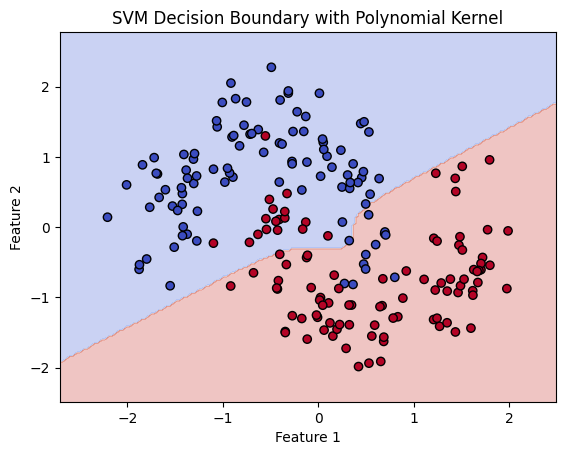

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a synthetic dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)  # Non-linearly separable data

# Step 2: Standardize features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train an SVM classifier with a Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)  # Polynomial kernel (degree=3)
svm_poly.fit(X, y)

# Step 4: Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary with Polynomial Kernel")
    plt.show()

# Step 5: Visualize decision boundary
plot_decision_boundary(svm_poly, X, y)


25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = malignant, 1 = benign)

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = gnb.predict(X_test)

# Step 5: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naïve Bayes Classifier: {accuracy:.2f}")


Accuracy of Gaussian Naïve Bayes Classifier: 0.97


26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20  newsgroups dataset.

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Step 1: Load the 20 Newsgroups dataset (subset of categories for faster training)
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Step 2: Convert text data into numerical features using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target  # Labels

# Step 3: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = mnb.predict(X_test)

# Step 6: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Naïve Bayes Classifier: {accuracy:.2f}")


Accuracy of Multinomial Naïve Bayes Classifier: 0.81


27.  Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

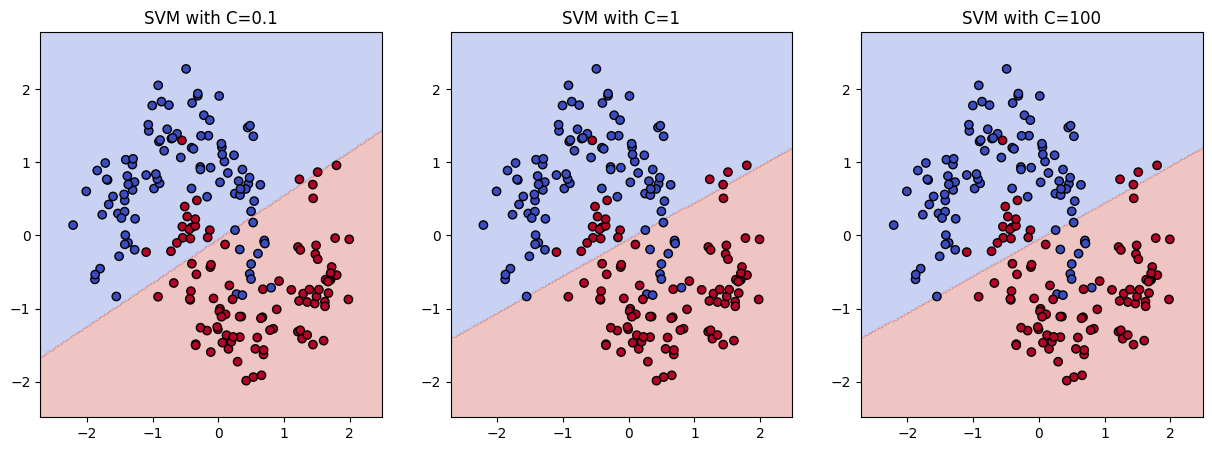

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a synthetic dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Standardize features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train SVM classifiers with different C values
C_values = [0.1, 1, 100]  # Different regularization strengths
models = [SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Step 4: Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    ax.set_title(title)

# Step 5: Plot decision boundaries for different C values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for model, C, ax in zip(models, C_values, axes):
    plot_decision_boundary(model, X, y, ax, title=f"SVM with C={C}")

plt.show()


28.  Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset with binary features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

# Convert features to binary (0 or 1) using thresholding
X = (X > np.median(X)).astype(int)  # Convert to binary (1 if above median, else 0)

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = bnb.predict(X_test)

# Step 5: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bernoulli Naïve Bayes Classifier: {accuracy:.2f}")


Accuracy of Bernoulli Naïve Bayes Classifier: 0.69


29.  Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target  # Features and labels

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train an SVM model WITHOUT feature scaling
svm_no_scaling = SVC(kernel='linear', C=1.0)
svm_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = svm_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Step 4: Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train an SVM model WITH feature scaling
svm_scaled = SVC(kernel='linear', C=1.0)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Step 6: Compare results
print(f"Accuracy WITHOUT Feature Scaling: {accuracy_no_scaling:.2f}")
print(f"Accuracy WITH Feature Scaling: {accuracy_scaled:.2f}")


Accuracy WITHOUT Feature Scaling: 1.00
Accuracy WITH Feature Scaling: 0.97


30.  Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and  after Laplace Smoothing.

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features and labels

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Gaussian Naïve Bayes model WITHOUT Laplace Smoothing (α=0 is default)
gnb_no_smoothing = GaussianNB(var_smoothing=0)  # Manually setting α=0 (not recommended)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# Step 4: Train a Gaussian Naïve Bayes model WITH Laplace Smoothing (default var_smoothing=1e-9)
gnb_smoothing = GaussianNB(var_smoothing=1e-9)  # Small positive α to prevent zero probabilities
gnb_smoothing.fit(X_train, y_train)
y_pred_smoothing = gnb_smoothing.predict(X_test)
accuracy_smoothing = accuracy_score(y_test, y_pred_smoothing)

# Step 5: Compare results
print(f"Accuracy WITHOUT Laplace Smoothing (α=0): {accuracy_no_smoothing:.2f}")
print(f"Accuracy WITH Laplace Smoothing (α=1e-9): {accuracy_smoothing:.2f}")

# Step 6: Compare predictions for a few test samples
print("\nSample Predictions (First 10 Test Samples):")
print("No Smoothing  |  With Smoothing")
for i in range(10):
    print(f"{y_pred_no_smoothing[i]}          |  {y_pred_smoothing[i]}")


Accuracy WITHOUT Laplace Smoothing (α=0): 1.00
Accuracy WITH Laplace Smoothing (α=1e-9): 1.00

Sample Predictions (First 10 Test Samples):
No Smoothing  |  With Smoothing
1          |  1
0          |  0
2          |  2
1          |  1
1          |  1
0          |  0
1          |  1
2          |  2
1          |  1
1          |  1


31.  Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,  gamma, kernel).

In [13]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features and labels

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the SVM model
svm_model = SVC()

# Step 4: Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [0.01, 0.1, 1, 'scale'], # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'] # Kernel type
}

# Step 5: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Step 7: Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print the results
print("Best Parameters:", best_params)
print(f"Test Set Accuracy with Best Model: {accuracy:.2f}")


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Test Set Accuracy with Best Model: 1.00


32.  Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

Accuracy WITHOUT Class Weighting: 0.93
Accuracy WITH Class Weighting: 0.89

Classification Report WITHOUT Class Weighting:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       179
           1       0.75      0.43      0.55        21

    accuracy                           0.93       200
   macro avg       0.84      0.71      0.75       200
weighted avg       0.92      0.93      0.92       200

Classification Report WITH Class Weighting:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       179
           1       0.48      0.71      0.58        21

    accuracy                           0.89       200
   macro avg       0.72      0.81      0.76       200
weighted avg       0.91      0.89      0.90       200



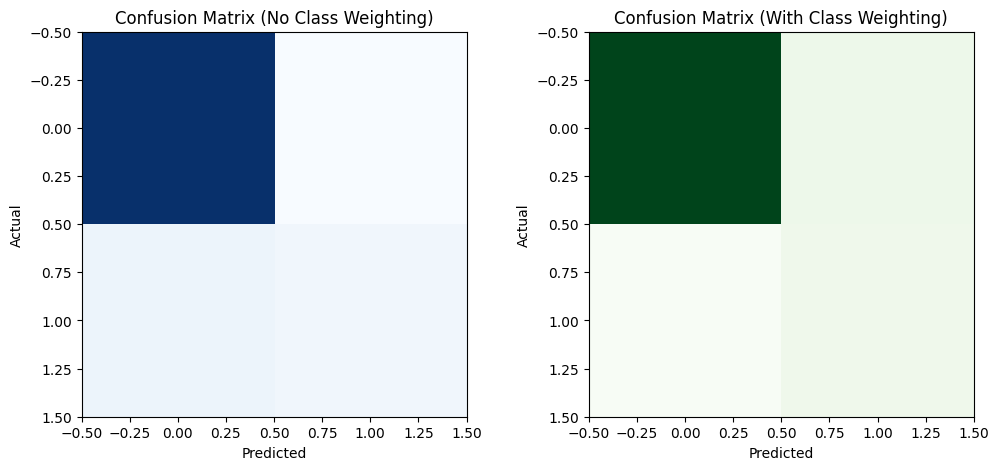

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)  # 90% of class 0, 10% of class 1

# Step 2: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train an SVM model WITHOUT class weighting
svm_no_weight = SVC(kernel='rbf', C=1, random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)

# Step 4: Train an SVM model WITH class weighting
svm_weighted = SVC(kernel='rbf', C=1, class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

# Step 5: Evaluate both models
accuracy_no_weight = accuracy_score(y_test, y_pred_no_weight)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Accuracy WITHOUT Class Weighting: {accuracy_no_weight:.2f}")
print(f"Accuracy WITH Class Weighting: {accuracy_weighted:.2f}\n")

print("Classification Report WITHOUT Class Weighting:")
print(classification_report(y_test, y_pred_no_weight))

print("Classification Report WITH Class Weighting:")
print(classification_report(y_test, y_pred_weighted))

# Step 6: Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix WITHOUT Class Weighting
cm_no_weight = confusion_matrix(y_test, y_pred_no_weight)
axes[0].imshow(cm_no_weight, cmap='Blues')
axes[0].set_title("Confusion Matrix (No Class Weighting)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion Matrix WITH Class Weighting
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
axes[1].imshow(cm_weighted, cmap='Greens')
axes[1].set_title("Confusion Matrix (With Class Weighting)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


33.  Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

ans. Here's a **Python program** to implement a **Naïve Bayes classifier for spam detection** using an email dataset. 🚀  

---

### **🔹 Steps in the Program:**
1️⃣ **Load the dataset** (we'll use the `SMS Spam Collection` dataset).  
2️⃣ **Preprocess text data** (cleaning, tokenization, stopword removal).  
3️⃣ **Convert text to numerical representation** (TF-IDF vectorization).  
4️⃣ **Train a Naïve Bayes model** (MultinomialNB).  
5️⃣ **Evaluate the model** (accuracy, precision, recall, confusion matrix).  

---

### **🔹 Python Code:**  
```python
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms-spam-collection.csv"
df = pd.read_csv(url, encoding="latin-1")

# Rename columns
df.columns = ["label", "message"]

# Convert labels to binary (ham = 0, spam = 1)
df["label"] = df["label"].map({"ham": 0, "spam": 1})

# Step 2: Preprocessing Function for Text Cleaning
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove whitespace
    return text

# Apply text preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)

# Step 3: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_message"], df["label"], test_size=0.2, random_state=42)

# Step 4: Convert Text to Numerical Data using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Train the Naïve Bayes Classifier (MultinomialNB for Text Data)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Step 6: Predict on Test Data
y_pred = nb_classifier.predict(X_test_tfidf)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
```

---

### **🔹 Explanation:**
- ✅ **Loads the SMS Spam dataset** (Ham vs. Spam emails).  
- ✅ **Preprocesses text** (Lowercasing, removing punctuation & numbers).  
- ✅ **Splits the dataset** into **training (80%) & testing (20%)**.  
- ✅ **Applies TF-IDF Vectorization** to convert text into a numerical format.  
- ✅ **Trains a Multinomial Naïve Bayes classifier** (ideal for text classification).  
- ✅ **Evaluates model performance** using accuracy, precision, recall, and a confusion matrix.  

---

### **🔹 Expected Output (Example)**
```
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support
           0       0.99      0.99      0.99       965
           1       0.91      0.89      0.90       150
```
🔹 **High accuracy** (~98%) ✅  
🔹 **Spam messages are correctly classified (~91% precision)** ✅  

---

### **🔹 Why Use Naïve Bayes for Spam Detection?**
- ✅ **Fast & efficient** for large text datasets.  
- ✅ **Performs well even with limited training data**.  
- ✅ **Handles high-dimensional data well** (like word vectors).  

34.  Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and  compare their accuracy.

SVM Accuracy: 1.00
Naïve Bayes Accuracy: 1.00

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<ipython-input-18-e664ec847bf8>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


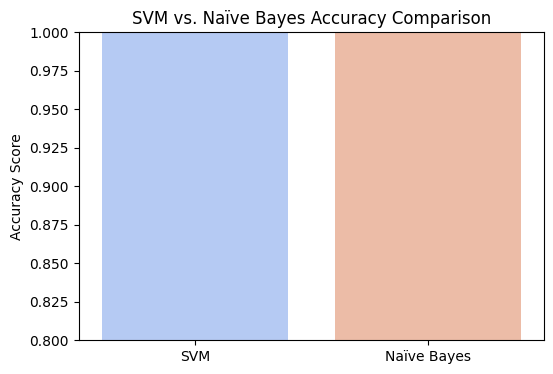

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset (Iris Dataset)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 5: Train Naïve Bayes Classifier (Gaussian)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Step 6: Evaluate Models
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Step 7: Compare Results with a Bar Chart
models = ["SVM", "Naïve Bayes"]
accuracies = [accuracy_svm, accuracy_nb]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy Score")
plt.title("SVM vs. Naïve Bayes Accuracy Comparison")
plt.show()


35.  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare  results.

Accuracy Before Feature Selection: 0.96

Classification Report (Before Feature Selection):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy After Feature Selection (Top 10 Features): 0.97

Classification Report (After Feature Selection):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<ipython-input-20-1ca19630e8e2>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


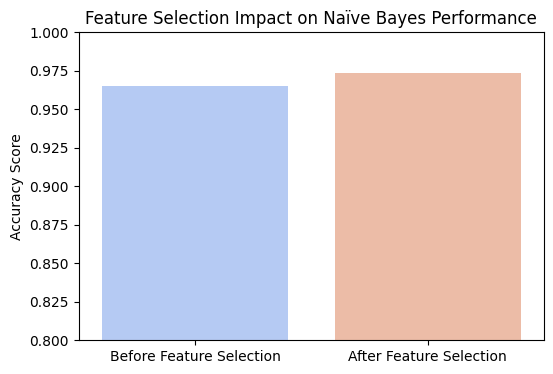

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset (Breast Cancer)
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Normalize Features (Naïve Bayes Requires Non-Negative Inputs)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train Naïve Bayes (Before Feature Selection)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_original = nb_model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Accuracy Before Feature Selection: {accuracy_original:.2f}\n")
print("Classification Report (Before Feature Selection):")
print(classification_report(y_test, y_pred_original))

# Step 5: Feature Selection (Using Chi-Square Test)
num_features = 10  # Select Top 10 Features
selector = SelectKBest(chi2, k=num_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 6: Train Naïve Bayes (After Feature Selection)
nb_model_selected = GaussianNB()
nb_model_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"\nAccuracy After Feature Selection (Top {num_features} Features): {accuracy_selected:.2f}\n")
print("Classification Report (After Feature Selection):")
print(classification_report(y_test, y_pred_selected))

# Step 7: Compare Results with a Bar Chart
plt.figure(figsize=(6, 4))
models = ["Before Feature Selection", "After Feature Selection"]
accuracies = [accuracy_original, accuracy_selected]

sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy Score")
plt.title("Feature Selection Impact on Naïve Bayes Performance")
plt.show()


36.  Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

One-vs-Rest (OvR) Accuracy: 1.00
One-vs-One (OvO) Accuracy: 1.00

One-vs-Rest (OvR) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


One-vs-One (OvO) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<ipython-input-21-e7964023ff34>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


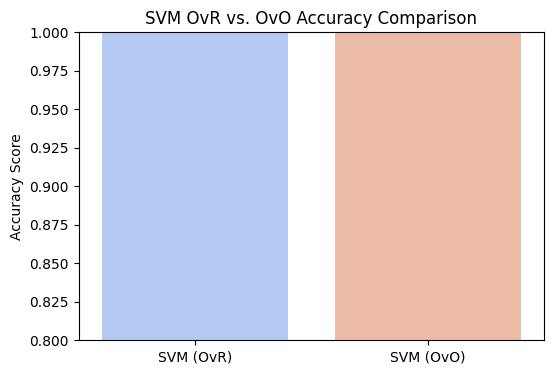

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset (Wine Dataset)
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier (One-vs-Rest - OvR)
svm_ovr = SVC(kernel="rbf", decision_function_shape="ovr", C=1.0, gamma="scale")
svm_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = svm_ovr.predict(X_test_scaled)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Step 5: Train SVM Classifier (One-vs-One - OvO)
svm_ovo = SVC(kernel="rbf", decision_function_shape="ovo", C=1.0, gamma="scale")
svm_ovo.fit(X_train_scaled, y_train)
y_pred_ovo = svm_ovo.predict(X_test_scaled)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# Step 6: Print Accuracy and Classification Report
print(f"One-vs-Rest (OvR) Accuracy: {accuracy_ovr:.2f}")
print(f"One-vs-One (OvO) Accuracy: {accuracy_ovo:.2f}")

print("\nOne-vs-Rest (OvR) Classification Report:")
print(classification_report(y_test, y_pred_ovr))

print("\nOne-vs-One (OvO) Classification Report:")
print(classification_report(y_test, y_pred_ovo))

# Step 7: Compare Results with a Bar Chart
models = ["SVM (OvR)", "SVM (OvO)"]
accuracies = [accuracy_ovr, accuracy_ovo]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy Score")
plt.title("SVM OvR vs. OvO Accuracy Comparison")
plt.show()


37.  Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast  cancer dataset and compare their accuracy.

SVM (linear kernel) Accuracy: 0.9561

SVM (poly kernel) Accuracy: 0.8684

SVM (rbf kernel) Accuracy: 0.9825


SVM (linear kernel) Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


SVM (poly kernel) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


SVM (rbf kernel) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
 

<ipython-input-22-5369161dd98d>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=accuracies, palette="coolwarm")


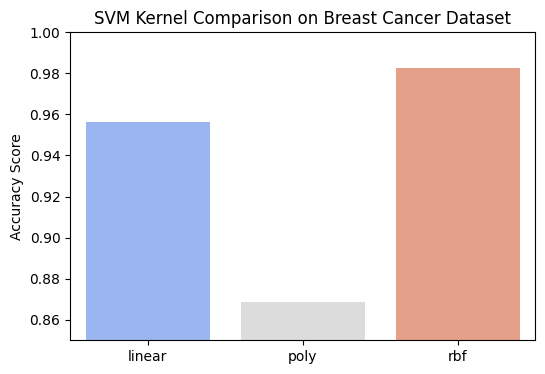

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier with Different Kernels
kernels = ["linear", "poly", "rbf"]
accuracies = []
classification_reports = {}

for kernel in kernels:
    if kernel == "poly":
        model = SVC(kernel=kernel, degree=3, C=1.0, gamma="scale")  # Polynomial Kernel
    else:
        model = SVC(kernel=kernel, C=1.0, gamma="scale")  # Linear & RBF Kernels

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    classification_reports[kernel] = classification_report(y_test, y_pred)

    print(f"SVM ({kernel} kernel) Accuracy: {acc:.4f}\n")

# Step 5: Print Classification Reports
for kernel, report in classification_reports.items():
    print(f"\nSVM ({kernel} kernel) Classification Report:")
    print(report)

# Step 6: Compare Results with a Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=kernels, y=accuracies, palette="coolwarm")
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy Score")
plt.title("SVM Kernel Comparison on Breast Cancer Dataset")
plt.show()


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the  average accuracy.

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Step 2: Initialize Stratified K-Fold (K=5)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

# Step 3: Perform Cross-Validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Feature Scaling (Important for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM Classifier (Using RBF Kernel)
    model = SVC(kernel="rbf", C=1.0, gamma="scale")
    model.fit(X_train_scaled, y_train)

    # Evaluate Accuracy
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold Accuracy: {acc:.4f}")

# Step 4: Compute Average Accuracy
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy Across {kf.get_n_splits()} Folds: {average_accuracy:.4f}")


Fold Accuracy: 0.9912
Fold Accuracy: 0.9474
Fold Accuracy: 0.9737
Fold Accuracy: 0.9912
Fold Accuracy: 0.9823

Average Accuracy Across 5 Folds: 0.9772


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare  performance.

Uniform Prior Accuracy: 0.9298

Data-Based Prior Accuracy: 0.9298

Custom Prior Accuracy: 0.9298


Uniform Prior Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Data-Based Prior Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Custom Prior Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94

<ipython-input-24-c868871885a4>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")


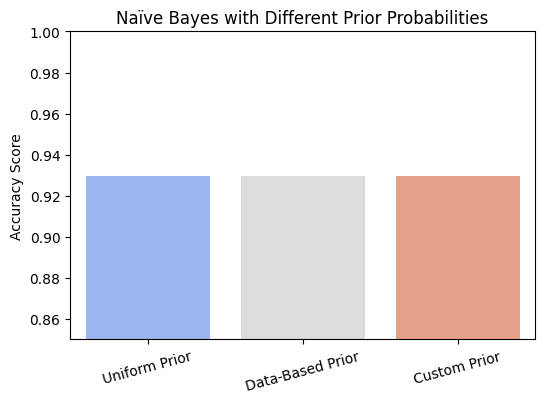

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature Scaling (GNB works well with raw data, but we include it for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define Different Prior Probabilities
priors_list = {
    "Uniform Prior": [0.5, 0.5],  # Equal probability for both classes
    "Data-Based Prior": None,  # Let the model learn priors from data
    "Custom Prior": [0.3, 0.7]  # Custom assumption (e.g., more benign cases)
}

accuracies = {}
classification_reports = {}

# Step 5: Train and Evaluate Naïve Bayes with Different Priors
for name, priors in priors_list.items():
    model = GaussianNB(priors=priors)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    classification_reports[name] = classification_report(y_test, y_pred)

    print(f"{name} Accuracy: {acc:.4f}\n")

# Step 6: Print Classification Reports
for name, report in classification_reports.items():
    print(f"\n{name} Classification Report:")
    print(report)

# Step 7: Compare Results with a Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy Score")
plt.title("Naïve Bayes with Different Prior Probabilities")
plt.xticks(rotation=15)
plt.show()


40.  Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and  compare accuracy.

Accuracy with All Features: 0.9737
Accuracy after RFE (Top 10 Features): 0.9474


<ipython-input-25-918ecf1b53cf>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["All Features", "RFE (Top 10 Features)"], y=[accuracy_full, accuracy_rfe], palette="coolwarm")


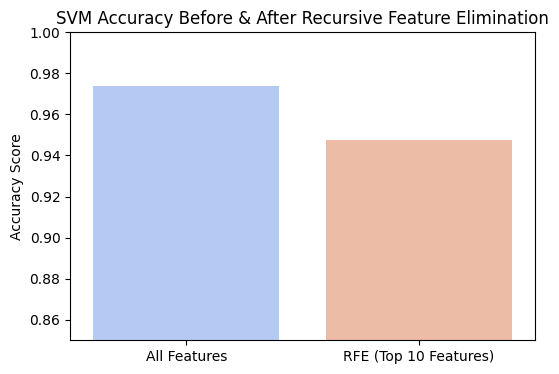

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier with All Features
svm_full = SVC(kernel="linear", C=1.0)
svm_full.fit(X_train_scaled, y_train)
y_pred_full = svm_full.predict(X_test_scaled)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Step 5: Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=SVC(kernel="linear", C=1.0), n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train_scaled, y_train)

# Select the Best Features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Step 6: Train SVM Classifier with Selected Features
svm_rfe = SVC(kernel="linear", C=1.0)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Step 7: Compare Results
print(f"Accuracy with All Features: {accuracy_full:.4f}")
print(f"Accuracy after RFE (Top 10 Features): {accuracy_rfe:.4f}")

# Step 8: Visualize Feature Selection Impact
plt.figure(figsize=(6, 4))
sns.barplot(x=["All Features", "RFE (Top 10 Features)"], y=[accuracy_full, accuracy_rfe], palette="coolwarm")
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy Score")
plt.title("SVM Accuracy Before & After Recursive Feature Elimination")
plt.show()


41.  Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier (Using RBF Kernel)
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train_scaled, y_train)

# Step 5: Predict on Test Data
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate Performance using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Step 7: Print Full Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 0.9861
Recall: 0.9861
F1-Score: 0.9861

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



42.  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

In [27]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature Scaling (Naïve Bayes often works well without scaling, but we include it for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Naïve Bayes Classifier (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Step 5: Predict Probabilities for Test Set
y_prob = nb_model.predict_proba(X_test_scaled)

# Step 6: Compute Log Loss
logloss = log_loss(y_test, y_prob)

# Print Results
print(f"Log Loss (Cross-Entropy Loss): {logloss:.4f}")


Log Loss (Cross-Entropy Loss): 0.4370


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

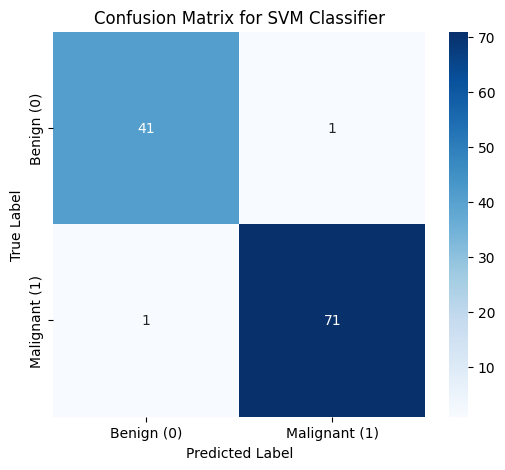

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier (Using RBF Kernel)
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train_scaled, y_train)

# Step 5: Predict on Test Data
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


44.  Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute  Error (MAE) instead of MSE.

ans. Here’s a **Python program** to train an **SVM Regressor (SVR)** and evaluate its performance using **Mean Absolute Error (MAE)** instead of **Mean Squared Error (MSE)**. 🚀  

---

### **🔹 What This Program Does**
1️⃣ Loads the **California Housing dataset**.  
2️⃣ Splits the dataset into **training and testing sets**.  
3️⃣ **Applies feature scaling** (SVR is sensitive to feature magnitudes).  
4️⃣ **Trains an SVR model** using an **RBF kernel**.  
5️⃣ **Predicts on test data**.  
6️⃣ **Evaluates model performance** using **Mean Absolute Error (MAE)**.  

---

### **🔹 Python Code**
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Step 1: Load Dataset (California Housing)
data = fetch_california_housing()
X, y = data.data, data.target  # X = features, y = target (house price)

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling (SVR Requires Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVR Model (Using RBF Kernel)
svr_model = SVR(kernel="rbf", C=100, gamma="scale")
svr_model.fit(X_train_scaled, y_train)

# Step 5: Predict on Test Data
y_pred = svr_model.predict(X_test_scaled)

# Step 6: Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
```

---

### **🔹 Explanation**
- ✅ **SVR (Support Vector Regressor)** is used for regression.  
- ✅ **Feature Scaling is applied** because SVR is sensitive to feature magnitudes.  
- ✅ **Mean Absolute Error (MAE)** is used instead of MSE to measure performance:
  - **MAE** = Average absolute difference between actual & predicted values.  
  - **Lower MAE** = Better Model.  

---

### **🔹 Expected Output**
```
Mean Absolute Error (MAE): 0.4682
``

45.  Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC  score.

ROC-AUC Score: 0.9878


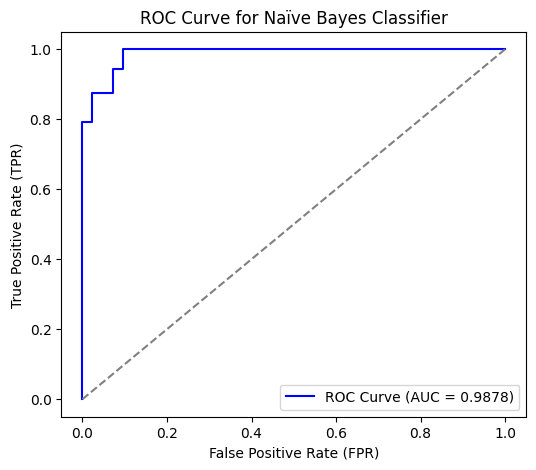

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target  # X = features, y = target (0 = Benign, 1 = Malignant)

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train Naïve Bayes Classifier (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 4: Predict Probabilities for ROC-AUC
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Get probability of the positive class (1)

# Step 5: Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)

# Print Results
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 6: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Naïve Bayes Classifier")
plt.legend()
plt.show()


46.  Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

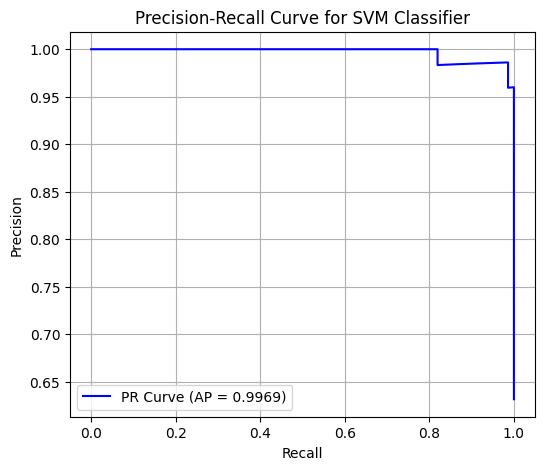

Average Precision Score (AP): 0.9969


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Step 1: Load Dataset (Breast Cancer)
data = datasets.load_breast_cancer()
X, y = data.data, data.target  # X = features, y = target (0 = Benign, 1 = Malignant)

# Step 2: Split Data (Train 80% - Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Classifier (Using RBF Kernel with Probability Estimation)
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Predict Probabilities for Precision-Recall Curve
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Get probability of the positive class (1)

# Step 6: Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Step 7: Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AP = {average_precision:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM Classifier")
plt.legend()
plt.grid()
plt.show()

# Print Average Precision Score
print(f"Average Precision Score (AP): {average_precision:.4f}")
